# **LOAD DATASET**

In [69]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Housing.csv")

In [70]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
df.shape

(545, 13)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [73]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [74]:
duplicate_rows=df[df.duplicated()]
if duplicate_rows.empty:
  print("no duplicates")
else:
  print("duplicates")

no duplicates


In [108]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# **Exploratory Data Analysis (EDA)**

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

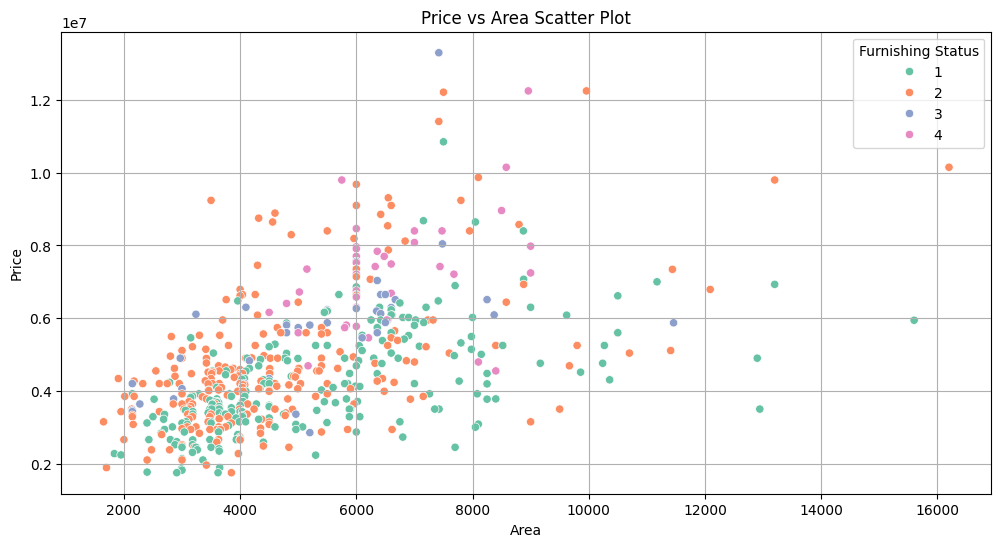

In [77]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

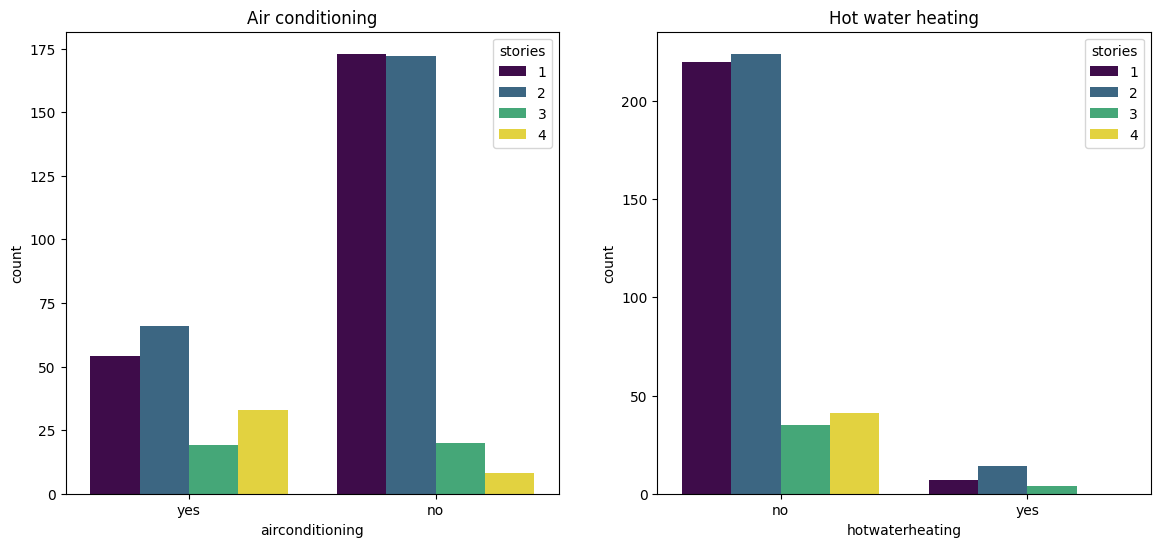

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<ipython-input-79-78842239de6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")


<Axes: xlabel='basement', ylabel='None'>

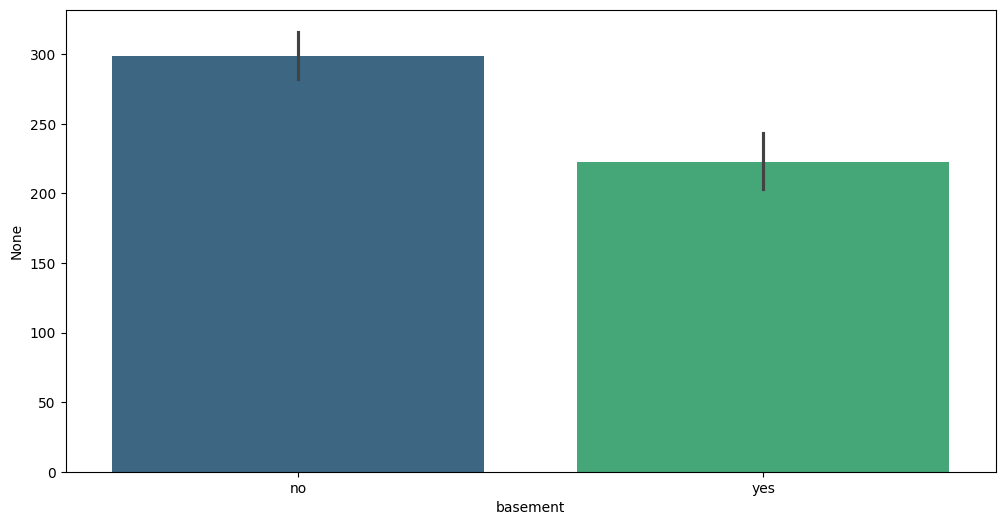

In [79]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

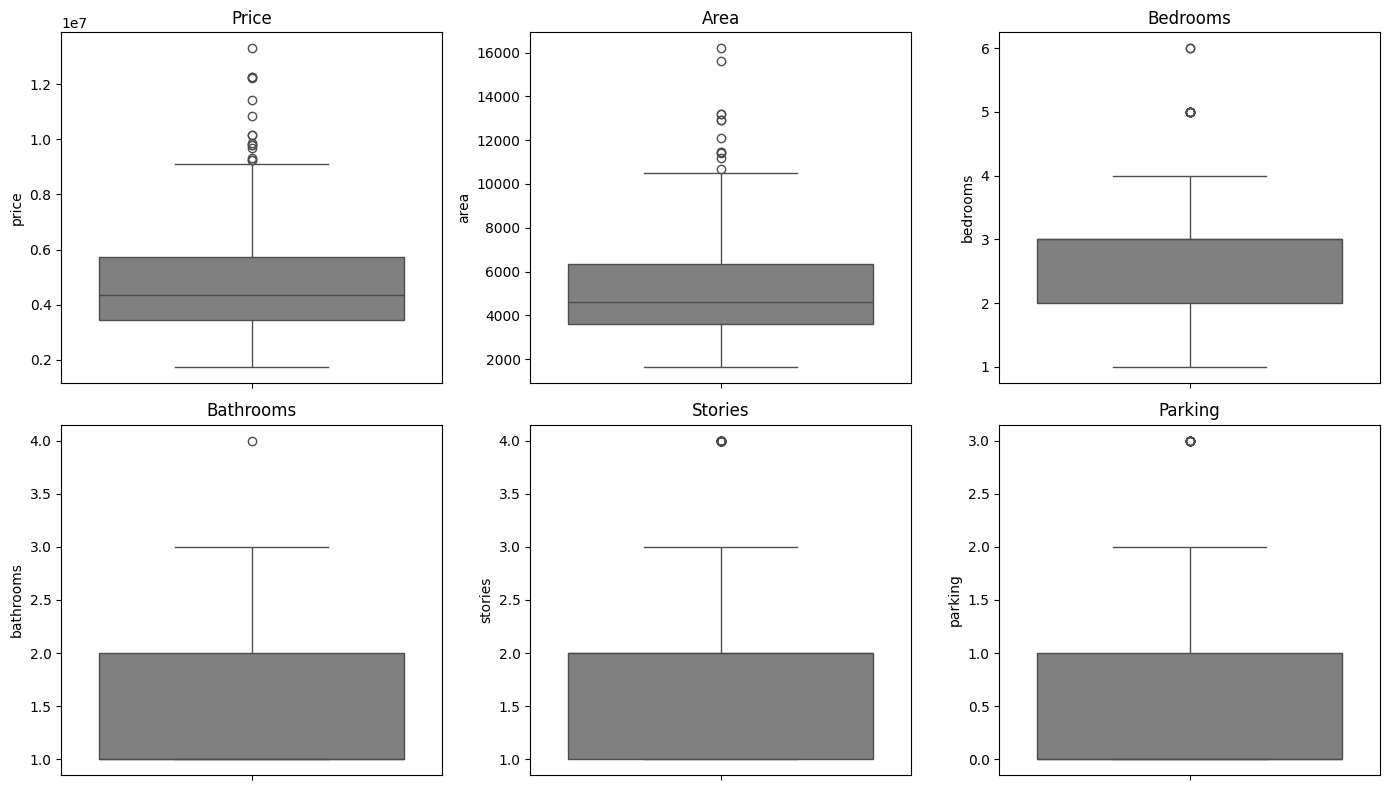

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], color="grey")
        axs[i, j].set_title(columns[counter].capitalize())
        counter += 1

plt.tight_layout()
plt.show()

# **Preprocessing**

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [83]:
df["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [84]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)

In [85]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [86]:
df['furnishingstatus']=LabelEncoder().fit_transform(df['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# **Model Building**

In [87]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC

In [88]:
models = {
    'Linear Regression': LinearRegression(n_jobs=5),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    "SVC":SVC()
}

# **Model Evaluation**

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [101]:
x=df.drop("price",axis=1)
y=df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [102]:
X_train.dtypes

area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [103]:
a=1
best_r2=-1

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the pipeline
    model=pipe.fit(X_train, y_train)
    y_pre=model.predict(X_test)

    print(f'{a} :- {name} - MSE: {mean_squared_error(y_test, y_pre):.4f}')
    print(f'     {name} - R2: {r2_score(y_test, y_pre):.4f}')
    print(f'     {name} - MAE: {mean_absolute_error(y_test, y_pre):.4f}',"\n")
    a+=1
    r2=r2_score(y_test, y_pre)
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

1 :- Linear Regression - MSE: 1771751116594.0410
     Linear Regression - R2: 0.6495
     Linear Regression - MAE: 979679.6913 

2 :- Random Forest - MSE: 1926458586407.9880
     Random Forest - R2: 0.6189
     Random Forest - MAE: 1024502.0098 

3 :- Gradient Boosting - MSE: 1694295463401.8369
     Gradient Boosting - R2: 0.6648
     Gradient Boosting - MAE: 962511.0971 

4 :- Ridge Regression - MSE: 1772333186531.0127
     Ridge Regression - R2: 0.6494
     Ridge Regression - MAE: 979549.0281 

5 :- SVC - MSE: 4158739800458.7158
     SVC - R2: 0.1772
     SVC - MAE: 1466307.3394 



In [104]:
print(f'The best model is: {best_model_name}')
print(f'The best model R2 Score is: {best_r2}')

The best model is: Gradient Boosting
The best model R2 Score is: 0.6647993042292653


# **Predict Price**

In [107]:
data_to_predict = [[7424, 4, 1, 3, 1, 0, 0, 0, 1, 2, 1, 1]]

if best_model is not None:
    prediction = best_model.predict(data_to_predict)
    print("Best Model:", best_model_name)
    print("Predicted Price:", prediction)
else:
    print("No best model found. Something went wrong.")

Best Model: Gradient Boosting
Predicted Price: [8739107.44238481]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
